In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [9]:
#a)

x = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

model.fit(x, y)

#Hint: .fit()

LinearRegression()

Mean squared error equals: 57947526161.28837
Model score:  0.49670880166311393


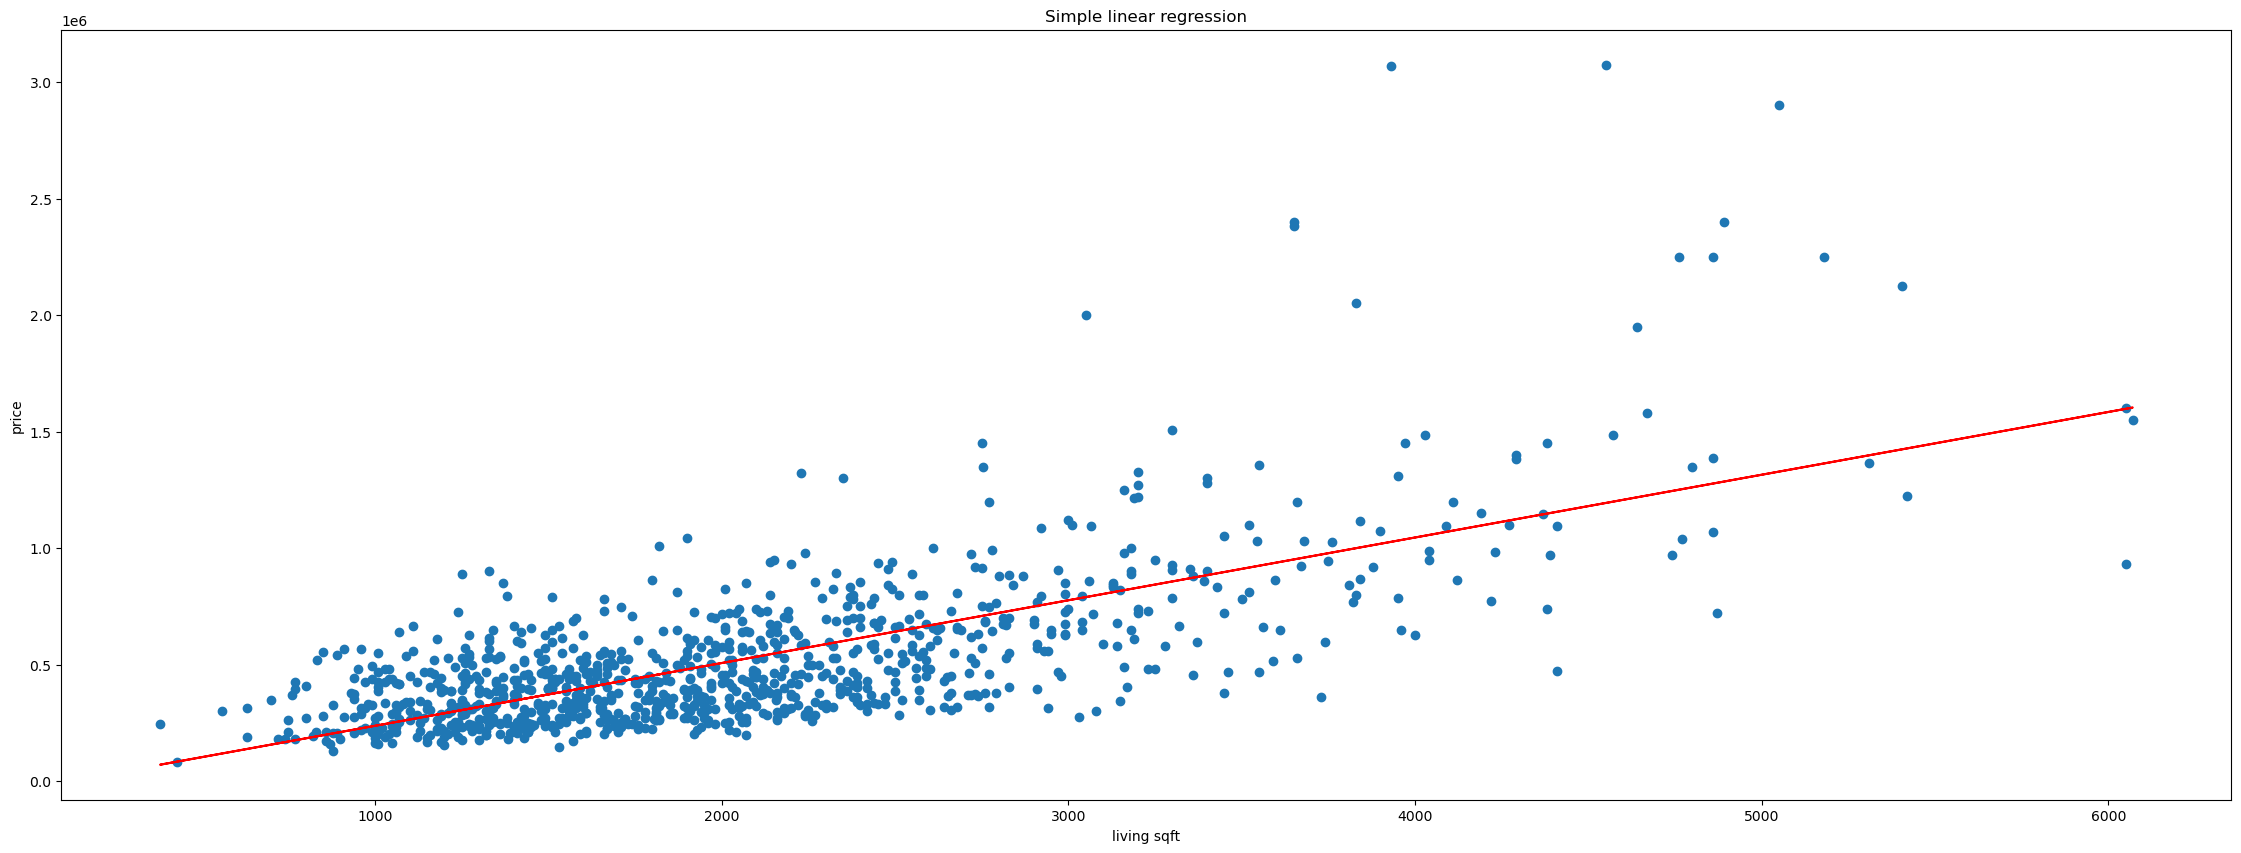

In [11]:
#b)
#Your code:
fig = plt.figure(figsize = (28,10))
plt.xlabel("living sqft")
plt.ylabel("price")
plt.plot(x, (x * model.coef_ + model.intercept_),"r")
plt.scatter(x,y)

plt.title("Simple linear regression")
print('Mean squared error equals:',mean_squared_error(y, (x*model.coef_+model.intercept_)))
print('Model score: ', model.score(x, y))

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

## Comment
The scatter plot shows a positive correlation: larger properties tend to have higher prices, though the variation is substantial.

1. Regression Line: The red line shows the model’s prediction of price based on square footage, but the wide spread of data points indicates that size alone doesn't fully explain the price.
2. Mean Squared Error (MSE): The MSE is quite large, meaning the model’s price predictions deviate significantly from the actual prices.
3. Model Score: The model score is 0.497, meaning it explains about 49.67% of the variance in price. Other factors, like location or condition, likely play a significant role.

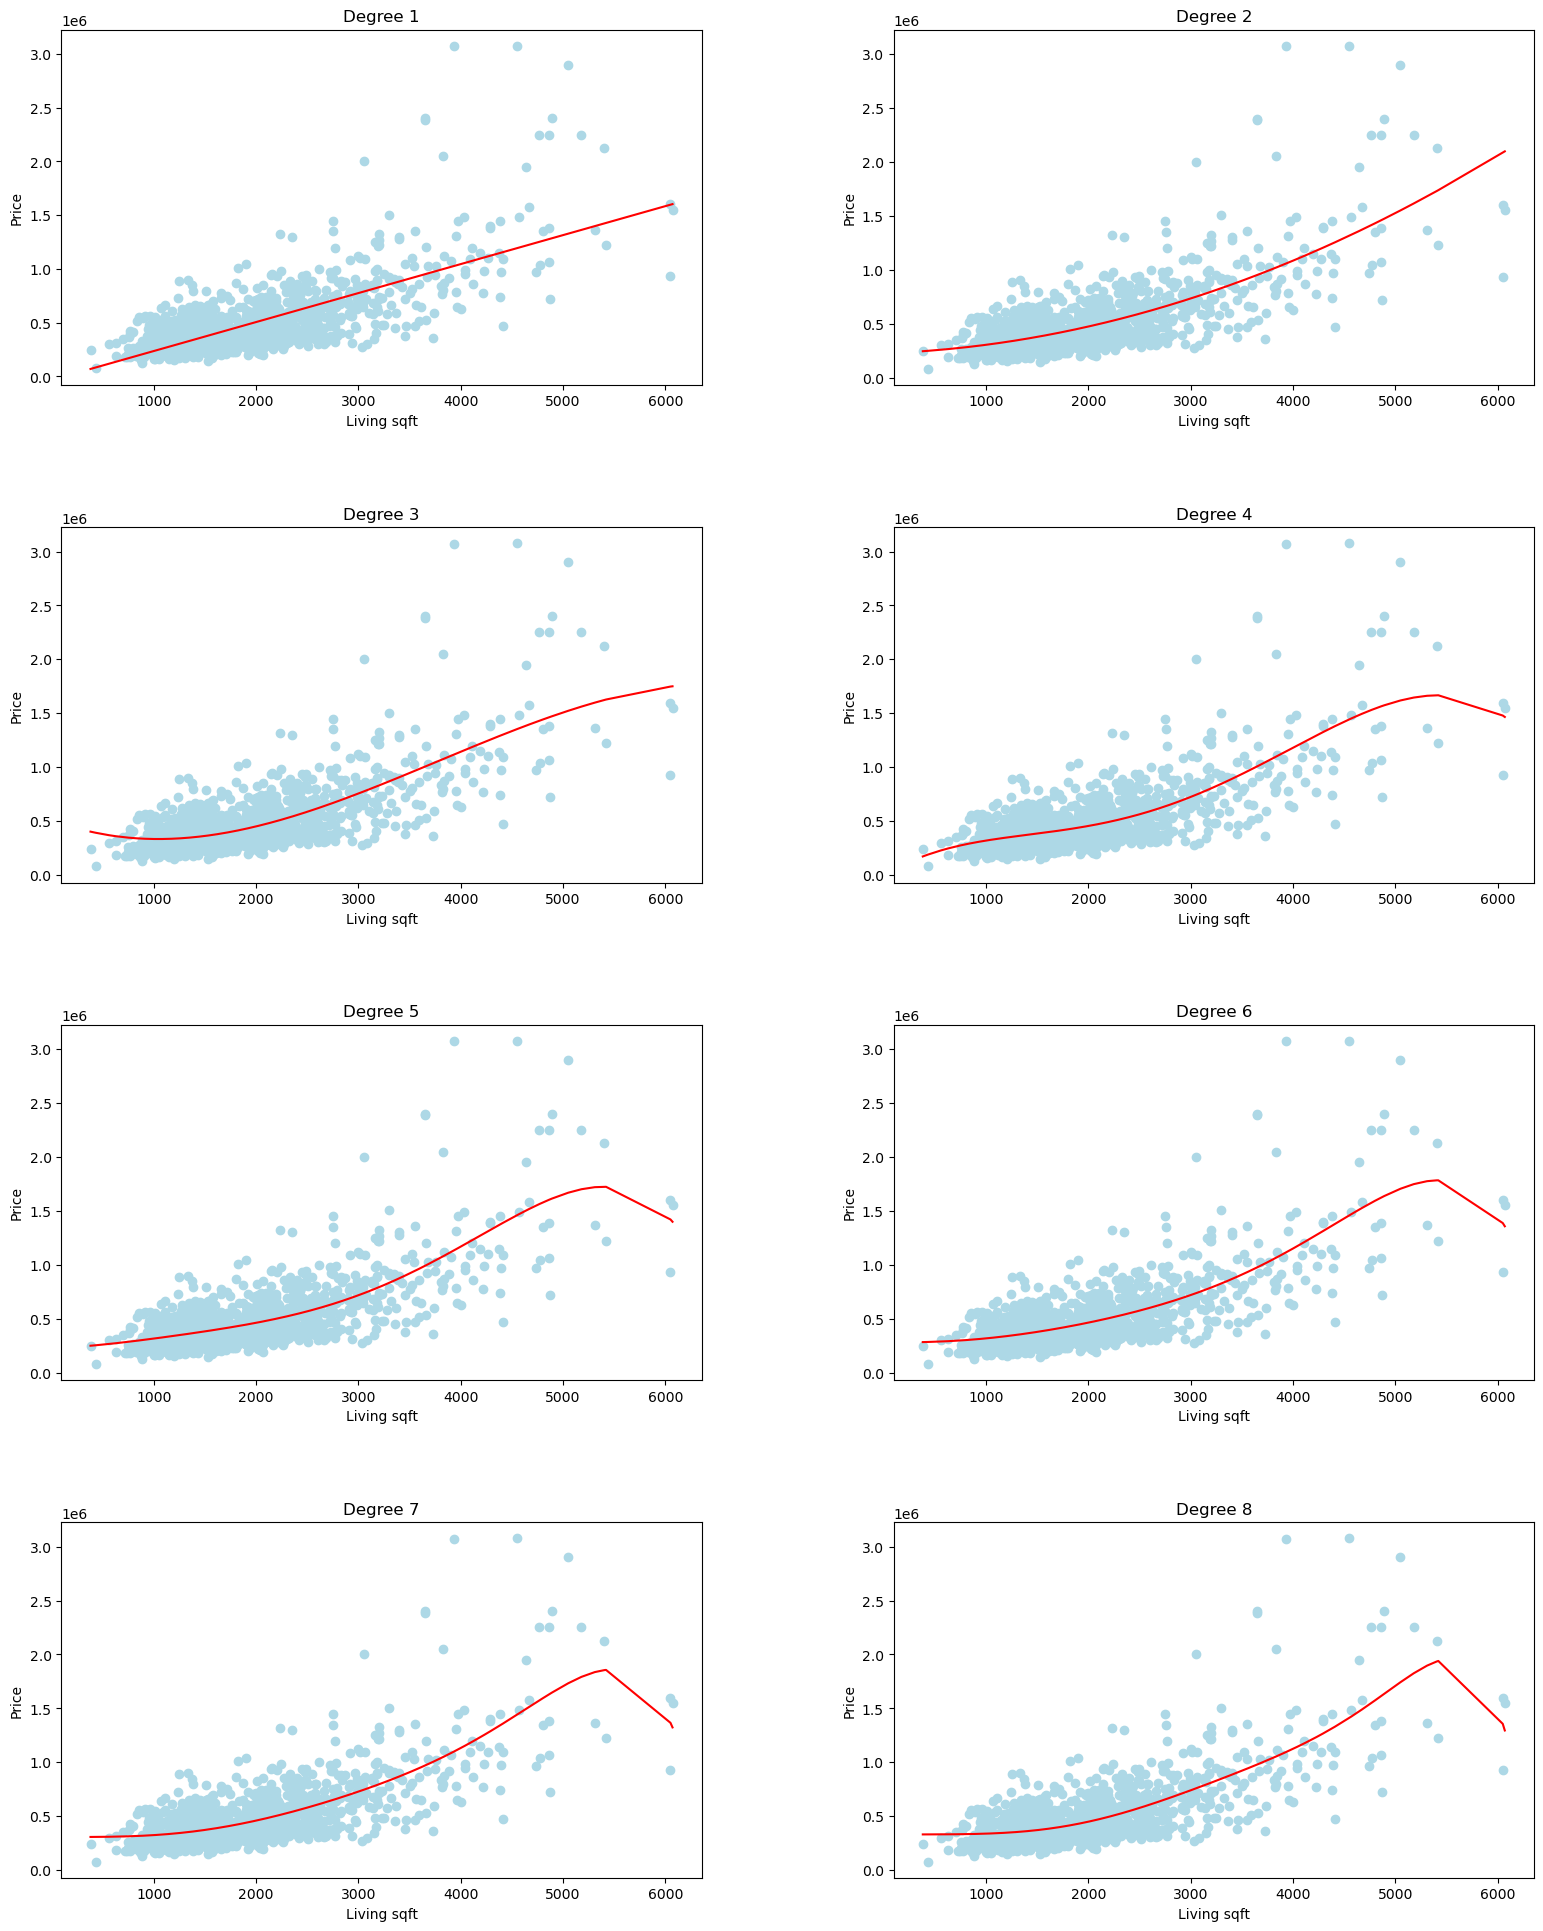

In [30]:
#c)
plt.figure(figsize=(19, 24))
sorted_idx = np.argsort(x.ravel()) 
x_sorted = x[sorted_idx]  
y_sorted = y[sorted_idx]  
mean_sq_err=[]

for order in range(1, 9):  
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(x_sorted)  

    model = LinearRegression()
    model.fit(X_order, y_sorted)  

    y_pred = model.predict(X_order)  

    plt.subplot(4, 2, order)  
    plt.scatter(x_sorted, y_sorted, color='lightblue')  
    plt.plot(x_sorted, y_pred, color='red')  
    plt.title(f'Degree {order}')  
    plt.xlabel('Living sqft')
    plt.ylabel('Price')
    mean_sq_err.append(mean_squared_error(y_sorted, y_pred))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


## Comment
1. Lower-degree models (1-3) offer a simple, general fit that captures the overall trend without overcomplicating the relationship. . They fit the overall data pattern but may miss subtler nonlinear relationships.
2. Higher-degree models (4-8) fit the data increasingly closely, but by degree 6, additional complexity doesn’t add value. Degrees 7 and 8 don’t improve the fit meaningfully and continue the risk of overfitting, where the model learns the noise in the data rather than just the underlying pattern. The curve becomes more complex, especially at the edges, which could lead to unreliable predictions.


Text(0, 0.5, 'Mean Squared Error')

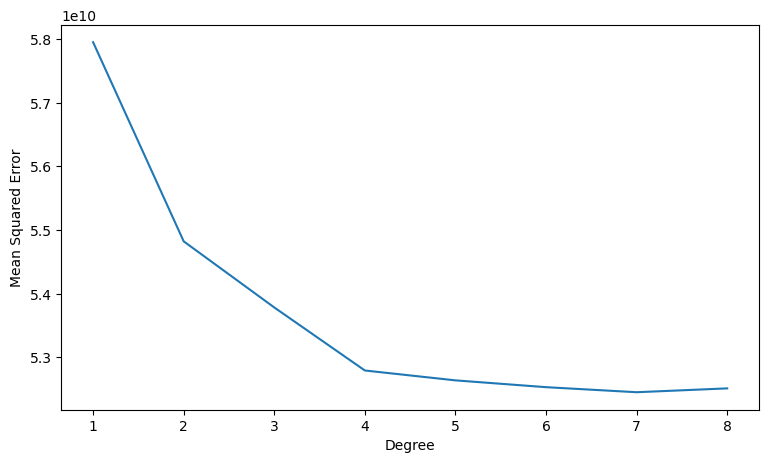

In [37]:
#Your code:
degree=[1,2,3,4,5,6,7,8]
fig=plt.figure(figsize = (9,5))
plt.plot(degree,mean_sq_err)
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')

## Comment
At first glance, the mean squared error (MSE) decreases with higher-degree polynomial models, suggesting better performance. However, these models overfit the data, capturing noise instead of general patterns, making them less reliable for new data. While MSE may drop, the models become too specific to the training set. Additionally, we see that the plot flatten at the end, indicating that more complexity doesn't always improve the model. In summary, a balance is needed between model complexity and reliability to avoid overfitting.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

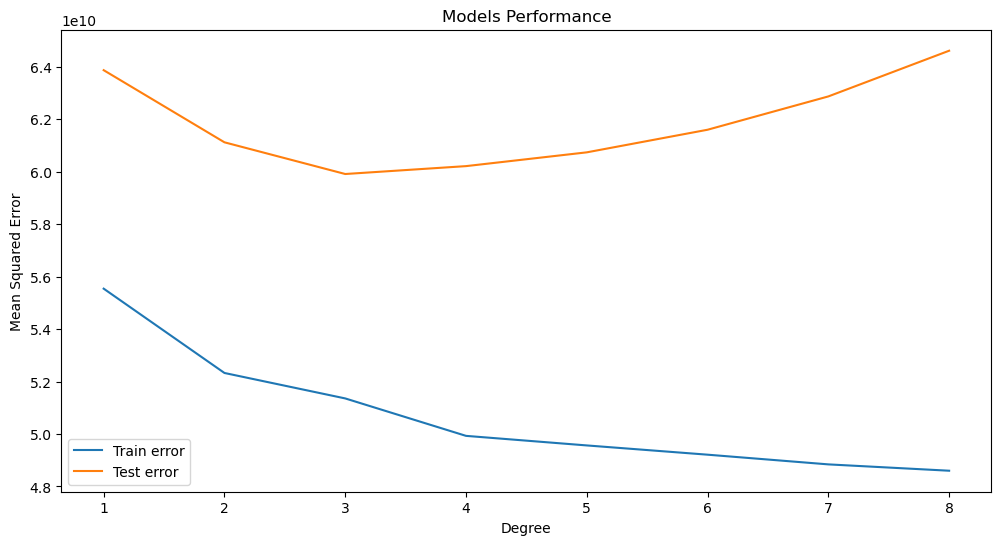

In [40]:
#a)
mean_train=[]
mean_test=[]
for order in range(1,9):
    poly=PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test=model.predict(X_test)
    mean_train.append(mean_squared_error(y_train, y_pred_train))
    mean_test.append(mean_squared_error(y_test, y_pred_test))
plt.figure(figsize = (12,6))
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.plot(degree,mean_train,label="Train error")
plt.plot(degree,mean_test,label="Test error")
plt.title("Models Performance")
plt.legend()

## Comment
As the degree increases, the training error decreases significantly, indicating a better fit to the training data. However, the test error begins to rise after degree 4, which suggests that the model is overfitting to the training set. Degrees 3 and 4 strike a balance between bias and variance, leading to more generalized predictions. This means that simpler models can often perform better on unseen data. Therefore, a degree of 3 or 4 is optimal for this dataset, ensuring a good trade-off between complexity and accuracy.


## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

Mean squared error equals: 396407.1889615157


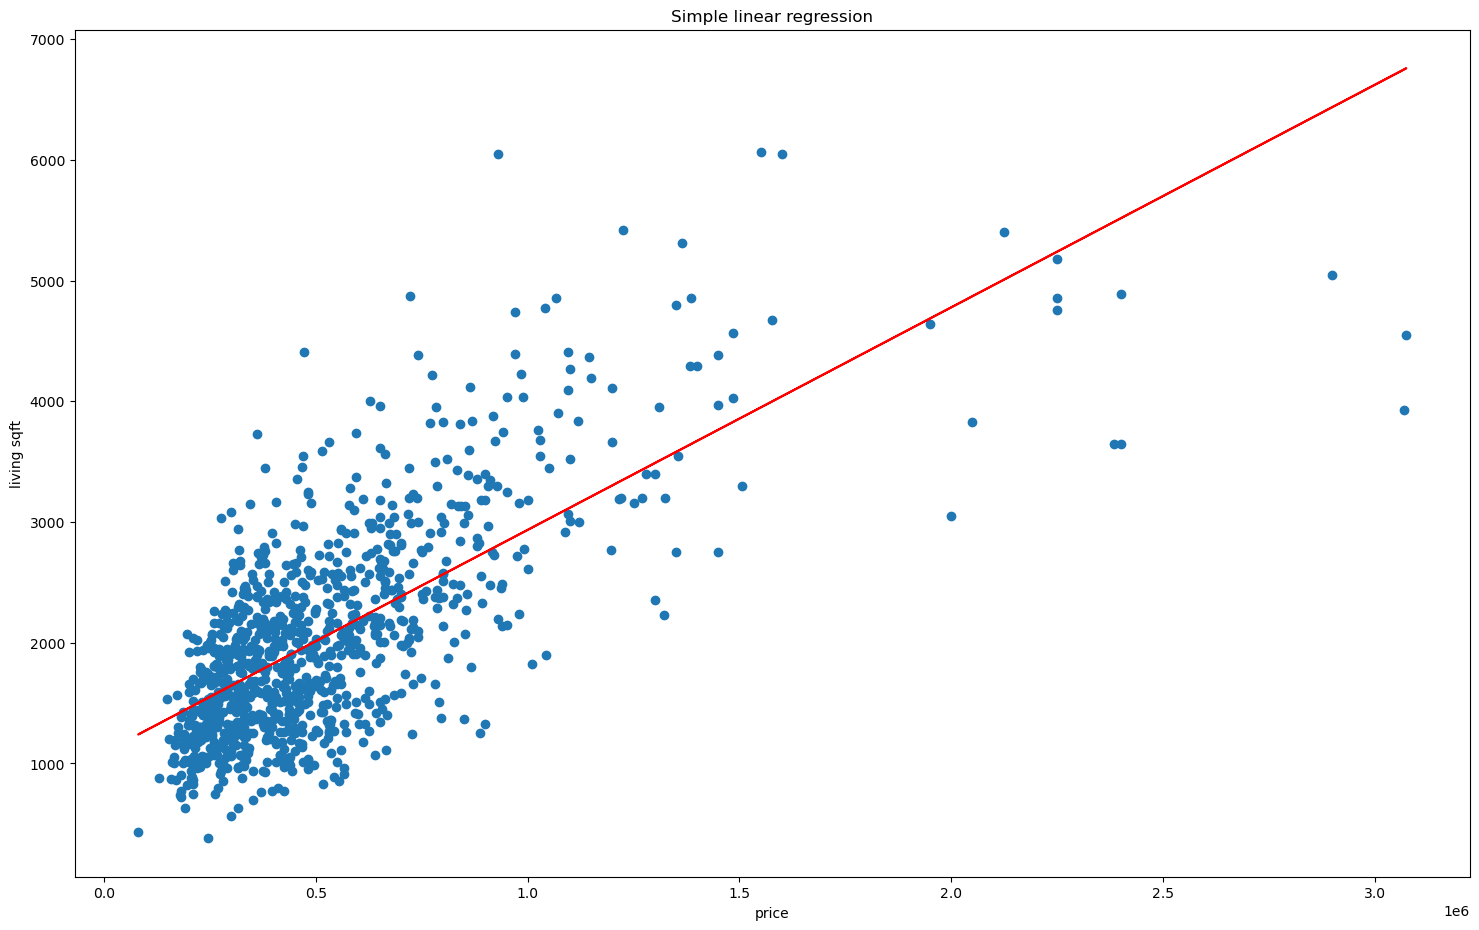

In [41]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model=LinearRegression()
model.fit(X, y)
fig=plt.figure(figsize = (18,11))
plt.scatter(X,y)
plt.plot(X,model.predict(X),'r')
plt.title("Simple linear regression")
plt.xlabel("price")
plt.ylabel("living sqft")
print('Mean squared error equals:',mean_squared_error(y, (X*model.coef_+model.intercept_)))


In [8]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:


Mean squared error equals: 48749900202.864044


Mean squared error equals:  2508812454751.561


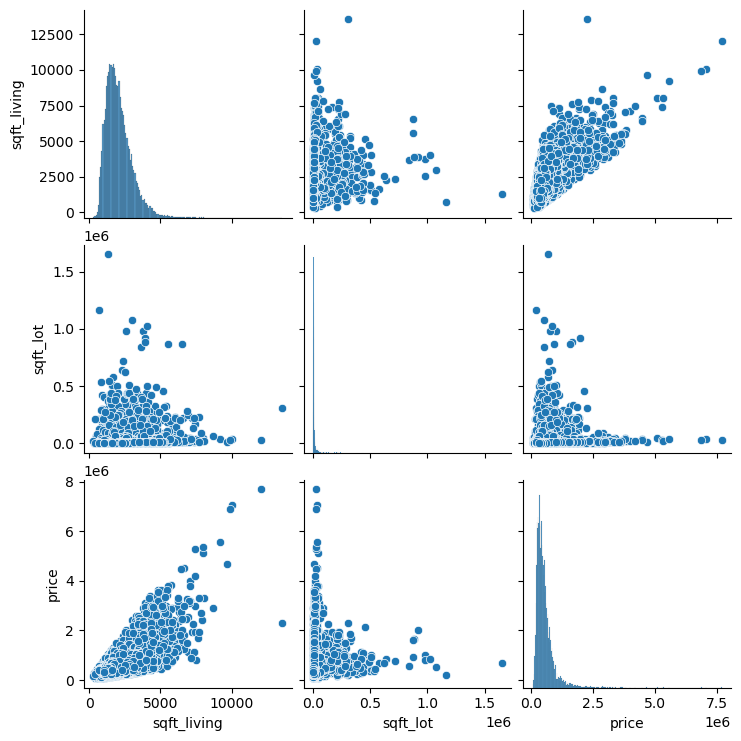

In [48]:
X = house_df[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors',
              'waterfront', 'view', 'condition', 'grade',
              'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
              'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = house_df['price']

poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.5, random_state=43)

model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error equals: ",  mean_squared_error(y_test, y_pred))